In [18]:
import pandas as pd
from sklearn import preprocessing

In [66]:
df = pd.read_csv("data/columns-removed-loan-data.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [67]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,tot_coll_amt,tot_cur_bal,open_act_il,open_il_24m,total_bal_il,il_util,open_rv_24m,max_bal_bc,all_util,acc_open_past_24mths
0,15000.0,15000.0,15000.0,60 months,10+ years,RENT,78000.0,Source Verified,Fully Paid,debt_consolidation,...,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,10400.0,10400.0,10400.0,36 months,8 years,MORTGAGE,58000.0,Not Verified,Charged Off,credit_card,...,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,21425.0,21425.0,21425.0,60 months,6 years,RENT,63800.0,Source Verified,Fully Paid,credit_card,...,0.0,42315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,12800.0,12800.0,12800.0,60 months,10+ years,MORTGAGE,125000.0,Verified,Current,car,...,0.0,261815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,7650.0,7650.0,7650.0,36 months,< 1 year,RENT,50000.0,Source Verified,Charged Off,debt_consolidation,...,0.0,64426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [4]:
df['emp_length'].value_counts()

10+ years    549538
2 years      148367
< 1 year     133332
3 years      130871
1 year       107680
5 years      101848
4 years       98103
6 years       75568
8 years       72664
7 years       70395
9 years       63214
Name: emp_length, dtype: int64

In [5]:
df['home_ownership'].value_counts()

MORTGAGE    815170
RENT        653236
OWN         177629
ANY            507
OTHER          182
NONE            54
Name: home_ownership, dtype: int64

In [6]:
df['verification_status'].value_counts()

Source Verified    628245
Not Verified       516009
Verified           502524
Name: verification_status, dtype: int64

In [7]:
df['purpose'].value_counts()

debt_consolidation    955783
credit_card           363962
home_improvement      109031
other                  93576
major_purchase         35596
medical                18901
small_business         18613
car                    17641
moving                 11388
vacation               11152
house                   7268
wedding                 2350
renewable_energy        1094
educational              423
Name: purpose, dtype: int64

In [8]:
df['addr_state'].value_counts()

CA    230904
NY    137063
TX    135564
FL    115714
IL     66540
NJ     61088
PA     57032
OH     55414
GA     53916
VA     46927
NC     45955
MI     43098
MD     39111
AZ     38663
MA     37906
CO     34448
WA     34424
MN     29409
IN     27096
MO     26291
CT     25849
TN     25415
NV     23320
WI     21722
AL     20337
SC     20114
OR     19403
LA     19245
KY     15967
OK     15044
KS     14173
AR     12382
UT     11034
NM      8856
MS      8752
NH      8092
HI      8055
RI      7263
WV      5156
NE      4856
DE      4665
MT      4608
DC      4122
AK      3934
WY      3566
VT      3513
SD      3316
ME      2982
ND      2282
ID      2178
IA        14
Name: addr_state, dtype: int64

In [9]:
df['loan_status'].value_counts()

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
Name: loan_status, dtype: int64

In [10]:
df['application_type'].value_counts()

Individual    1612264
Joint App       34514
Name: application_type, dtype: int64

In [11]:
df['term'].value_counts()

 36 months    1182406
 60 months     464372
Name: term, dtype: int64

# Predictor

In [20]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def plot_importances(clf,x_data):
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    labels=[]
    for x in indices:
        labels.append(x_data.columns[x])
    X=x_data
    
    plt.figure(figsize=(30,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices],align="center")
    plt.xticks(range(X.shape[1]), labels)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    plt.savefig("trans-customer-model")

### Uses 6 loan status, 200k data

In [14]:
df_tr = df.truncate(after=200000,axis=0)
y_data = df_tr['loan_status'].astype('category').cat.codes
y_data.head(2)

0    3
1    0
dtype: int8

In [15]:
x_data=df_tr.drop(['loan_status'],axis=1)
x_data= x_data.astype('category')
for each in x_data:
    x_data[each] = x_data[each].cat.codes

In [16]:
x_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,...,tot_coll_amt,tot_cur_bal,open_act_il,open_il_24m,total_bal_il,il_util,open_rv_24m,max_bal_bc,all_util,acc_open_past_24mths
0,559,559,559,1,1,3,10936,1,2,41,...,0,75960,-1,-1,-1,-1,-1,-1,-1,5
1,375,375,375,0,8,1,7648,0,1,4,...,0,80184,-1,-1,-1,-1,-1,-1,-1,7


In [132]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [146]:
def RFC(X_train,X_test, y_train ,y_test):
    clf = RandomForestClassifier(n_estimators = 100,
                                 max_features='sqrt',
                                 max_depth=None,
                                 n_jobs=-1)
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test,y_test.ravel())
    return (clf,score)

In [147]:
clf,score = RFC(X_train,X_test, y_train ,y_test)

In [148]:
score

0.7222046299228346

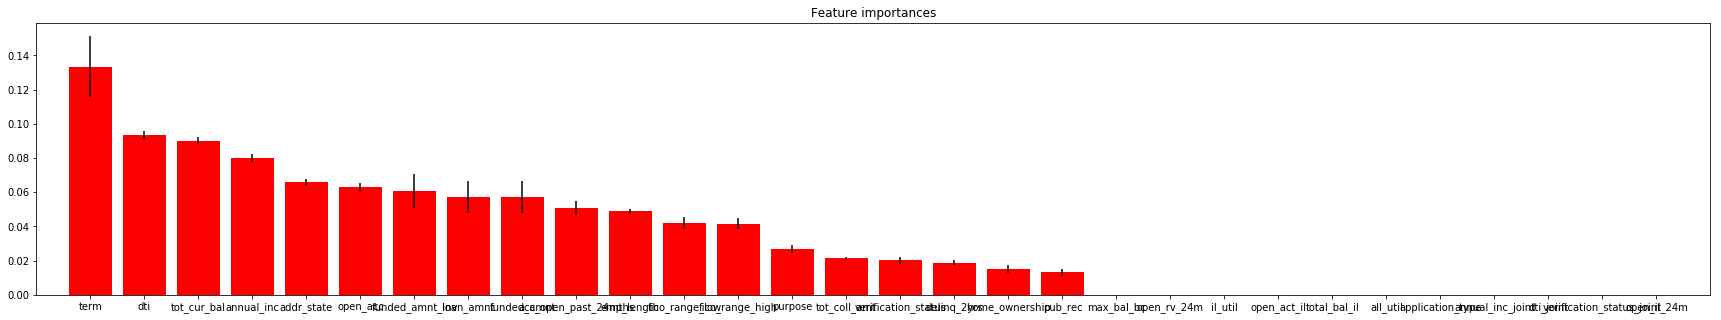

<Figure size 432x288 with 0 Axes>

In [76]:
plot_importances(clf,x_data)

Results: 
1. 100 estimators, sqrt features, gini,  = 0.7205379910334828
2. 1000 estimators, sqrt features, gini = 0.7222046299228346
3. 100 estimators, sqrt features, entropy = 0.7194380093665106
3. 1000 estimators, sqrt features, entropy = 0.7222046299228346

### Using all data, two loan status only

In [5]:
status=['Charged Off','Fully Paid']
df_two_output = df[df['loan_status'].isin(status)]
y_data = df_two_output['loan_status'].astype('category').cat.codes
y_data.head(2)

0    1
1    0
dtype: int8

In [6]:
x_data=df_two_output.drop(['loan_status'],axis=1)
x_data= x_data.astype('category')
for each in x_data:
    x_data[each] = x_data[each].cat.codes

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
def RFC(X_train,X_test, y_train ,y_test):
    clf = RandomForestClassifier(n_estimators = 100,
                                 max_features='sqrt',
                                 max_depth=None,
                                 criterion="entropy",
                                 n_jobs=-1)
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test,y_test.ravel())
    return (clf,score)

In [8]:
clf,score = RFC(X_train,X_test, y_train ,y_test)
score

0.7954363261566652

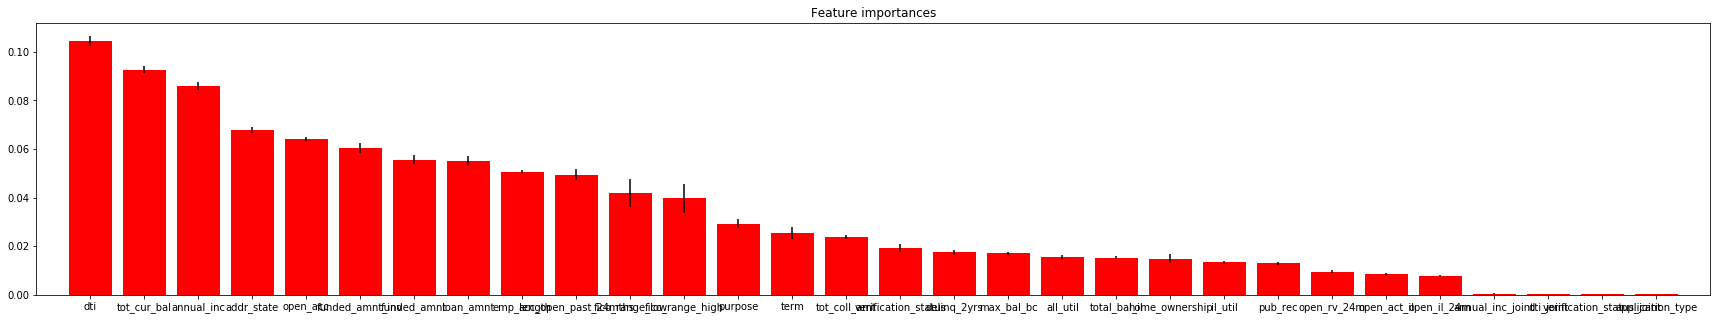

<Figure size 432x288 with 0 Axes>

In [9]:
plot_importances(clf,x_data)

Results: 2 categories of loan_status status=['Charged Off','Fully Paid']

1. 100 estimators, sqrt features, gini = 0.7947123879327269
2. 1000 estimators, sqrt features, gini = 0.7962297951704731
3. 100 estimators, sqrt features, entropy = 0.795215463647667
4. 1000 estimators, sqrt features, entropy = 0.7964670178653229

## Uses 400k data, 2 labels, Same as research paper

In [80]:
status=['Charged Off','Fully Paid']
df_two_output = df[df['loan_status'].isin(status)]
#df_two_output = df_two_output.truncate(after=400000,axis=0)
#df_two_output.to_csv("two-label-for-graph.csv")
df_two_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 34 columns):
loan_amnt                    814986 non-null float64
funded_amnt                  814986 non-null float64
funded_amnt_inv              814986 non-null float64
term                         814986 non-null object
emp_length                   772733 non-null object
home_ownership               814986 non-null object
annual_inc                   814986 non-null float64
verification_status          814986 non-null object
loan_status                  814986 non-null object
purpose                      814986 non-null object
zip_code                     814986 non-null object
addr_state                   814986 non-null object
dti                          814950 non-null float64
delinq_2yrs                  814986 non-null float64
fico_range_low               814986 non-null float64
fico_range_high              814986 non-null float64
open_acc                     814986 non-null flo

In [81]:
y_data = df_two_output['loan_status'].astype('category').cat.codes
x_data=df_two_output.drop(['loan_status'],axis=1)
x_data= x_data.astype('category')
for each in x_data:
    x_data[each] = x_data[each].cat.codes
x_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,...,tot_coll_amt,tot_cur_bal,open_act_il,open_il_24m,total_bal_il,il_util,open_rv_24m,max_bal_bc,all_util,acc_open_past_24mths
0,567,567,5731,1,1,5,30732,1,2,221,...,0,130071,-1,-1,-1,-1,-1,-1,-1,5
1,383,383,4046,0,8,1,21311,0,1,865,...,0,140030,-1,-1,-1,-1,-1,-1,-1,7
2,824,824,7199,1,6,5,24314,1,1,617,...,0,41776,-1,-1,-1,-1,-1,-1,-1,4
4,273,273,2741,0,10,5,16653,1,2,791,...,0,63015,-1,-1,-1,-1,-1,-1,-1,6
5,351,351,3619,0,1,5,26873,1,2,68,...,0,38040,-1,-1,-1,-1,-1,-1,-1,8


In [82]:
for column in x_data.columns:
    print(column," unique value count:" , x_data[column].nunique())

loan_amnt  unique value count: 1482
funded_amnt  unique value count: 1482
funded_amnt_inv  unique value count: 8947
term  unique value count: 2
emp_length  unique value count: 12
home_ownership  unique value count: 6
annual_inc  unique value count: 45930
verification_status  unique value count: 3
purpose  unique value count: 14
zip_code  unique value count: 925
addr_state  unique value count: 51
dti  unique value count: 4946
delinq_2yrs  unique value count: 29
fico_range_low  unique value count: 40
fico_range_high  unique value count: 40
open_acc  unique value count: 78
pub_rec  unique value count: 30
revol_util  unique value count: 1318
total_acc  unique value count: 133
application_type  unique value count: 2
annual_inc_joint  unique value count: 1172
dti_joint  unique value count: 2086
verification_status_joint  unique value count: 4
tot_coll_amt  unique value count: 9914
tot_cur_bal  unique value count: 314999
open_act_il  unique value count: 42
open_il_24m  unique value count: 30


In [83]:
y_data.value_counts()

1    646902
0    168084
dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [89]:
def RFC(X_train,X_test, y_train ,y_test):
    clf = RandomForestClassifier(n_estimators = 700,
                                 max_features='sqrt',
                                 max_depth=None,
                                 n_jobs=-1)
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test,y_test.ravel())
    return (clf,score)

In [90]:
clf,score = RFC(X_train,X_test, y_train ,y_test)
score

0.796696060467247

In [ ]:
# Compute ROC curve and ROC area for each class
#y_predict = model.predict(X_test).tolist()
from sklearn.metrics import roc_curve,auc
y_predict =clf.predict(X_test).tolist()
fpr,tpr,thresholds=roc_curve(y_predict,list(y_test))
print(thresholds)
roc_auc = auc(fpr,tpr)

# confus_matr=confusion_matrix(y_predict,list(y_test))
# TP = confus_matr[0][0] # True Positive
# FN = confus_matr[0][1] # False Negative
# FP = confus_matr[1][0] # False Positive
# TN = confus_matr[1][1] # True Negative

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.1])
plt.ylim([0,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
y_train.value_counts()

1    453104
0    117386
dtype: int64

In [47]:
y_test.value_counts()

1    193798
0     50698
dtype: int64

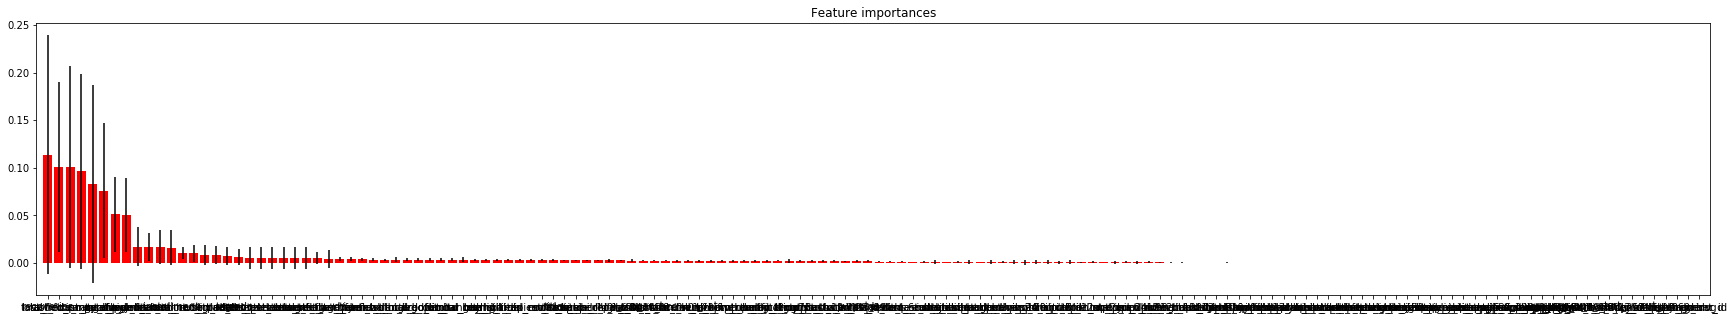

<Figure size 432x288 with 0 Axes>

In [41]:
plot_importances(clf,x_data)

In [42]:
clf.feature_importances_

array([0.00000000e+00, 1.65246463e-02, 1.73894746e-02, 1.65766836e-02,
       7.50465192e-03, 8.27077146e-03, 1.62979545e-02, 6.20307230e-03,
       8.54340620e-03, 3.29665321e-03, 2.27255172e-03, 1.27298712e-03,
       3.71460129e-03, 2.22792942e-03, 2.94107963e-03, 0.00000000e+00,
       1.61707656e-03, 1.96026636e-03, 2.97385775e-03, 3.13261594e-03,
       2.56880933e-03, 4.49795173e-03, 8.72026796e-04, 3.04882270e-03,
       3.57566643e-03, 3.37274485e-03, 1.47192694e-03, 1.98733845e-03,
       1.10499291e-03, 2.51476823e-03, 6.61078872e-04, 3.82692359e-03,
       3.59156848e-03, 2.89273861e-03, 8.85507298e-04, 0.00000000e+00,
       0.00000000e+00, 5.10543257e-02, 5.03398903e-02, 1.00793711e-01,
       1.06483521e-02, 5.04791328e-03, 1.13753358e-01, 8.31742877e-02,
       4.44317629e-03, 7.57014622e-02, 0.00000000e+00, 1.00880030e-02,
       9.64239236e-02, 1.00572195e-01, 1.73687103e-04, 1.28644555e-03,
       0.00000000e+00, 3.09970928e-05, 4.56920354e-05, 5.29010577e-05,
      

#### Results
1. 100 estimators, sqrt features, entropy = 0.8102192198158819
2. 700 estimators, sqrt features, entropy = 0.8109477448837671

In [73]:
#K-fold Cross Validation
kf = KFold(n_splits=10,random_state=False)
score_list=[]
for train_index,test_index in kf.split(x_data):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test, y_train, y_test = x_data.iloc[train_index],x_data.iloc[test_index],y_data.iloc[train_index],y_data.iloc[test_index]
    clf,score = RFC(X_train,X_test, y_train ,y_test)
    score_list.append(score)
    print("Accuracy:" ,score)
print("avg score:", np.mean(score_list))

Accuracy: 0.8174713557189218
Accuracy: 0.8081992184912908
Accuracy: 0.8188952910788794
Accuracy: 0.8105172527981985
Accuracy: 0.8157825021524604
Accuracy: 0.822306112987615
Accuracy: 0.8293595602357772
Accuracy: 0.8577720378833036
Accuracy: 0.7626332869726472
Accuracy: 0.7463408172726671
avg score: 0.8089277435591761
